In [1]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('BITCOIN_PRICES_LAST_5_YEARS.csv', usecols=('Date', 'Close'))

In [4]:
df = df.rename(columns={'Date':'ds', 'Close': 'y'})
df.columns = df.columns.astype(str)
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df

,ds,y
0,2017-07-03,2567.00000
1,2017-07-04,2602.27000
2,2017-07-05,2602.12000
3,2017-07-06,2610.60000
4,2017-07-07,2520.75000
...,...,...
1820,2022-06-27,20732.98340
1821,2022-06-28,20293.45080
1822,2022-06-29,20101.12000
1823,2022-06-30,19816.74636


In [6]:
model = NeuralProphet()

In [7]:
metrics = model.fit(df, freq="D") 
future = model.make_future_dataframe(df, periods=365, n_historic_predictions=len(df)) 
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 162


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.10E-02, min: 1.19E+00


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.49E-02, min: 7.42E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.16E-02
Epoch[162/162]: 100%|██████████| 162/162 [00:32<00:00,  4.99it/s, SmoothL1Loss=0.0032, MAE=3.5e+3, RMSE=4.31e+3, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Text(0.5, 1.0, 'Bitcoin Prices Forecast')

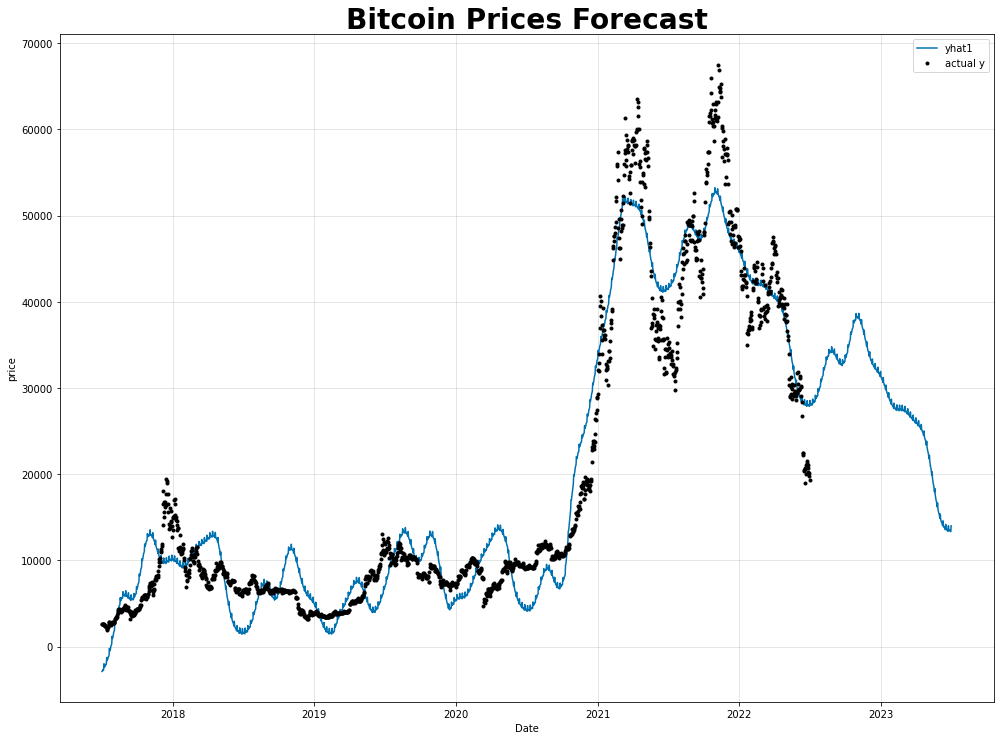

In [8]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="price", ax=ax)
ax.set_title("Bitcoin Prices Forecast", fontsize=28, fontweight="bold")

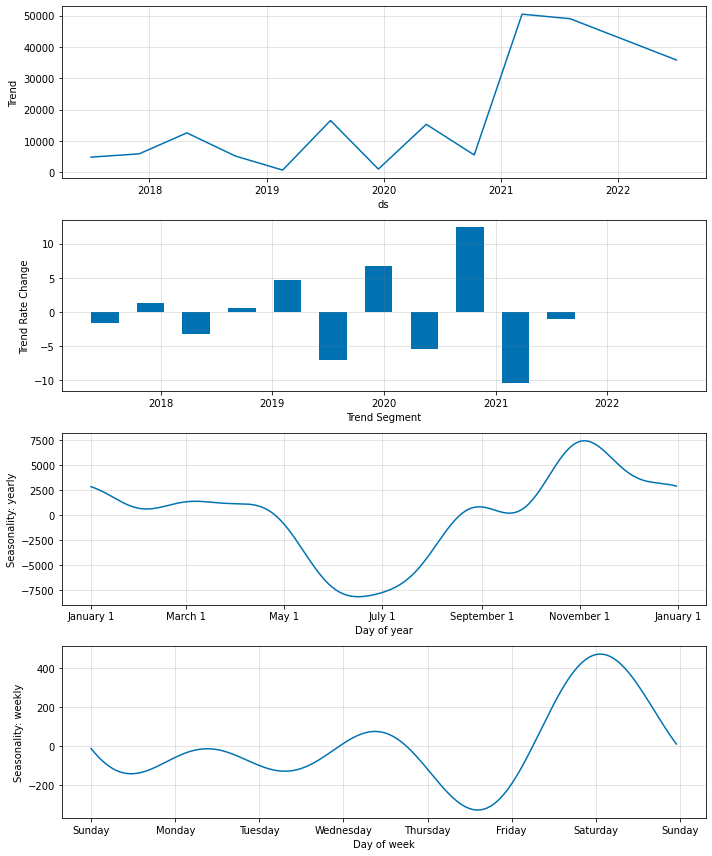

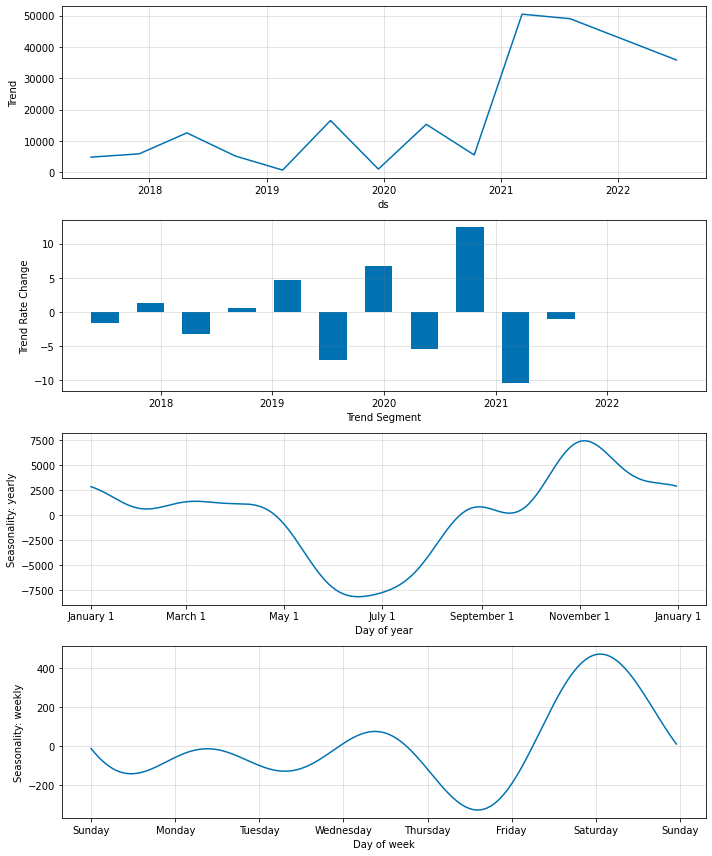

In [9]:
model.plot_parameters()

In [11]:
df_train, df_test = model.split_df(df=df, freq="D", valid_p=0.2)

metrics_train = model.fit(df=df_train, freq="D")
metrics_test = model.test(df=df_test)

metrics_test

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
ERROR - (NP.forecaster.fit) - Model has already been fitted. Re-fitting may break or produce different results.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


TypeError: ignored